(Useful_calculus:Fourier Transforms)=
# Fourier transforms

## Superposition of waves
When two or more waves meet, for example when two boats pass each other, their wake waves will overlap in space. The surface displacement (amplitude) will, at any point, be the sum of the surface displacement for the individual waves.

When looking at the ocean surface, the surface elevation can be regarded as the sum of (superposition) of many waves of different frequencies and phases.

Insert figure of individual waves and the superposition

Text(0.5, 0, 'time, t [s]')

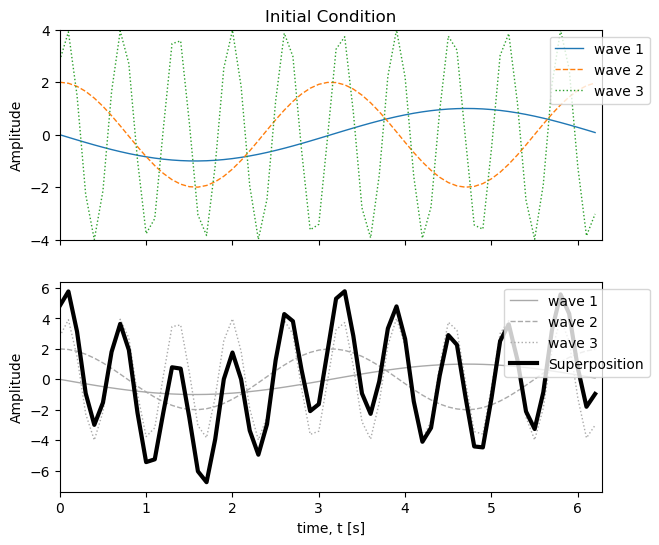

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create time values
t = np.arange(0, 2 * np.pi,0.1) #eight cycles, with 0.1 second resolution

#define frequencies, phases, and amplitudes of three sine waves
frequencies=1./np.array([2*np.pi,np.pi,2./np.pi])
phases=np.pi*np.array([1.,1./2,1./4])
amplitudes=np.array([1.,2.,4.])

# compute the wave signals
wave1 = amplitudes[0] * np.sin(2 * np.pi * frequencies[0] * t + phases[0])
wave2 = amplitudes[1] * np.sin(2 * np.pi * frequencies[1] * t + phases[1])
wave3 = amplitudes[2] * np.sin(2 * np.pi * frequencies[2] * t + phases[2])

# Add the sine waves together
superposition_wave = wave1 + wave2 + wave3

#plot the wave signals
fig, ax = plt.subplots(2, 1, figsize=(7, 6), sharex=True)
ax[0].set_xlim(( 0, 2*np.pi))
ax[0].set_ylim((-4, 4))

line1, = ax[0].plot(t, wave1,'-', lw = 1, label='wave 1')
line2, = ax[0].plot(t, wave2,'--', lw = 1, label='wave 2')
line3, = ax[0].plot(t, wave3,':', lw = 1, label='wave 3')

ax[1].plot(t, wave1,'-',color='darkgrey', lw = 1, label='wave 1')
ax[1].plot(t, wave2,'--',color='darkgrey', lw = 1, label='wave 2')
ax[1].plot(t, wave3,':',color='darkgrey',lw = 1, label='wave 3')
line4, = ax[1].plot(t, superposition_wave,'k', lw = 3, label='Superposition')

ax[0].set_ylabel('Amplitude')
ax[0].set_title("Initial Condition")
ax[0].legend(loc="upper right", bbox_to_anchor=(1.1, 1))
ax[1].legend(loc="upper right", bbox_to_anchor=(1.1, 1))
ax[1].set_ylabel('Amplitude')
ax[1].set_xlabel('time, t [s]')

## Time/space domain versus frequency domain - The Fourier Series

A data signal can be represented in either a time/space domain or a frequency domain. 

The time domain represents how the signal (for example air temperature) is changing with time, $t$. The time is running along the horizontal axis and the temperature is in the vertical axis. Mathematically, we would say that the temperature is a function of time, $f(t)$. Similarly, the space domain represents how the signal (for example air temperature) is changing with space or distance, $x$. Then, the resulting function would be $f(x)$. 

To get a meaningful interpretation of the frequency domain, we must first approximate our signal by a superposition of many waves with different frequencies, amplitudes, and phases. The more frequencies we include in the superposition, the better the approximation is.

The amplitude of each wave in the superposition, can be derived from the following equation:

$$
c_n=\frac{1}{T}\int_{-t/2}^{T/2}f(t)e^{-i\frac{2\pi}{T}t}dt
$$ (eq:Fourier_series_amplitude)

The approximated signal is called the Fourier series, and is calculated from:

$$
f(x)=\sum_{n=-\infty}^\infty c_n e^{i 2\pi\frac{n}{T}t}, t\in[-T/2,T/2]
$$ (eq:Fourier_series)

, where T represent a certain Time period of interest.

When we have created our approximated signal, we can calculate the amount of energy (wave amplitude) related to each frequency. The result is a function that displays the energy as a function of frequency. If we let $t\rightarrow \infty$ and include enough wave frequencies to allow $n/T \rightarrow \xi$ we can now write a function of the amount of energy as in terms of each wave. This is how our signal looks in the frequency domain, and this function is called the Fourier transform:

$$
\hat{f}(\xi)=\int_{-\infty}^\infty f(t)e^{-i2\pi\xi t}dt
$$ (eq:Fourier_transform)

Here, the function $\hat{f}(\xi)$ represent energy as a function of the frequency $\xi$. If the signal consisted of just one pure sine wave, the graph of $\hat{f}(\xi)$ would contain a single spike at the frequency of this sine wave.

In [2]:
from scipy.fft import fft

# Compute the Fourier transform
superposition_wave_fft = fft(superposition_wave)

# Frequency values for the Fourier transform
sampling_rate = 1 / (t[1] - t[0]) #1 sample per second
frequencies = np.fft.fftfreq(len(t), d=1/sampling_rate)

# Plot the Fourier transform
plt.figure(figsize=(8, 6))
plt.plot(frequencies, np.abs(superposition_wave_fft),'k',lw=2. label="Fourier Transform")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("Fourier Transform of superposition wave")

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1328466793.py, line 12)

# Gibbs phenomenon
In practice, we typically cannot include an infinite number of terms in the Fourier series to represent a signal. using a limited number of components works fine for continuous signals, but will produce errors (overshoots and undershoots) near discontinuities and areas wih strong gradients. This is called the Gibbs phenomenon.